# Sartorius 

Dit is een onderzoek naar het autmoatiseren van de annotatie op hersen cellen.
Dit onderzoek is gestart om te zorgen dat doktoren meer tijd over hebben voor andere bezigheden.

Door groep 4
Danny Rovers, Thomas achternaam en Liam Freke

In [1]:
import pandas as pd
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt

Als eerste wordt de data opgehaald. Wij beginnen daarmee door het csv bestandt train op te halen. Dit zie je in onderstaande code.

In [2]:
pad_naar_file = r"C:\Users\liamf\OneDrive - Hogeschool Leiden\Documenten\Northpool\Image_Processing\sartorius-cell-instance-segmentation\train.csv"
type(pad_naar_file)

str

In [3]:
def read_data(csv_file):
    dataframe = pd.read_csv(csv_file)

    #zet hier de code om de CSV file in te lezen
    return dataframe

In [4]:
#hier wordt jouw functie aangeroepen en bevat df nu het dataframe
dftabel = read_data(pad_naar_file);

In [5]:
dftabel

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
...,...,...,...,...,...,...,...,...,...
73580,ffdb3cc02eef,3610 3 4311 7 5014 9 5717 11 6420 13 7123 15 7...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73581,ffdb3cc02eef,341585 2 342287 5 342988 10 343690 13 344394 1...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73582,ffdb3cc02eef,47788 3 48490 7 49192 11 49896 13 50599 14 513...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73583,ffdb3cc02eef,333290 1 333993 2 334696 4 335399 5 336102 6 3...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00


Hierboven staat een deel van de data in het train csv bestandt. De data ziet er schoon uit maar wij zullen dit eerst testen voor de zekerheid. We zullen beginnen met het kijken naar de nullwaardes.

In [9]:
dftabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73585 entries, 0 to 73584
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 73585 non-null  object
 1   annotation         73585 non-null  object
 2   width              73585 non-null  int64 
 3   height             73585 non-null  int64 
 4   cell_type          73585 non-null  object
 5   plate_time         73585 non-null  object
 6   sample_date        73585 non-null  object
 7   sample_id          73585 non-null  object
 8   elapsed_timedelta  73585 non-null  object
dtypes: int64(2), object(7)
memory usage: 5.1+ MB


Hierboven staat de info over de tabel. Hierin staat ook dat er geen nullwaardes bevinden

In [7]:
pad_naar_file2 = r"C:\Users\liamf\OneDrive - Hogeschool Leiden\Documenten\Northpool\Image_Processing\sartorius-cell-instance-segmentation\test\7ae19de7bc2a.png"
type(pad_naar_file2)

str

<dtype: 'uint8'>


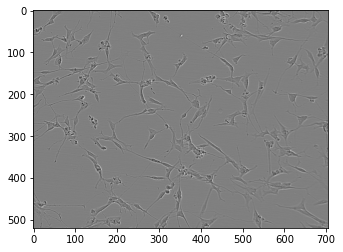

In [8]:
filterwarnings("ignore") 
tf_img = io.read_file(pad_naar_file2)
tf_img = image.decode_png(tf_img, channels=3)
print(tf_img.dtype)
plt.imshow(tf_img)